In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
X, y = load_boston().data, load_boston().target.reshape(-1,1)

In [3]:
class nn_regression(object):
    def __init__(self, eta = 0.0005, iterations = 1000):
        self.eta = eta
        self.iterations = iterations
    
    def fit(self,X,y):
        w_ = np.random.randn(X.shape[1],1)
        b_ = 0.0
        cost_ = []
        m_ = len(y)
        i = 1
        print('estimation starts now')
        while(i != self.iterations):
            Z = np.dot(X,w_) + b_
            #print(Z.shape)
            mse_ = self.mse(Z,y,m_)
            cost_.append(mse_)
            ## derivatives
            dZ = (Z-y) 
            dW = (2/m_) * np.dot(X.T,dZ) #500x 5  500x1
            db = (2/m_) * np.sum(dZ)
            ## updates
            w_ -= self.eta* dW
            b_ -= self.eta *db
            if i % 50 ==0:
                print(f'epoch:{i}__cost:{mse_}')     
            i += 1
        history = pd.DataFrame(cost_, columns=['cost'])
        history.plot(figsize = (14,5))
        return w_,b_
    
    def mse(self,y_true, y_pred,m):
        return np.sum(np.abs(y_pred-y_true))/m

estimation starts now
epoch:50__cost:47.9632050970788
epoch:100__cost:47.52554438221889
epoch:150__cost:47.09181441578906
epoch:200__cost:46.66271193339532
epoch:250__cost:46.238819984248615
epoch:300__cost:45.81915097705518
epoch:350__cost:45.40374219389952
epoch:400__cost:44.99270144011627
epoch:450__cost:44.58734103947087
epoch:500__cost:44.188583384432974
epoch:550__cost:43.794625630753686
epoch:600__cost:43.40809143633059
epoch:650__cost:43.03243534665339
epoch:700__cost:42.6632823971717
epoch:750__cost:42.30021990591322
epoch:800__cost:41.94371164854544
epoch:850__cost:41.59463558604833
epoch:900__cost:41.25024157066562
epoch:950__cost:40.911149393183806
epoch:1000__cost:40.57711006070807
epoch:1050__cost:40.24998585429422
epoch:1100__cost:39.92872972846462
epoch:1150__cost:39.613211613506856
epoch:1200__cost:39.30190311529143
epoch:1250__cost:38.99650042771909
epoch:1300__cost:38.697408231615036
epoch:1350__cost:38.40363000704376
epoch:1400__cost:38.11476643328719
epoch:1450__co

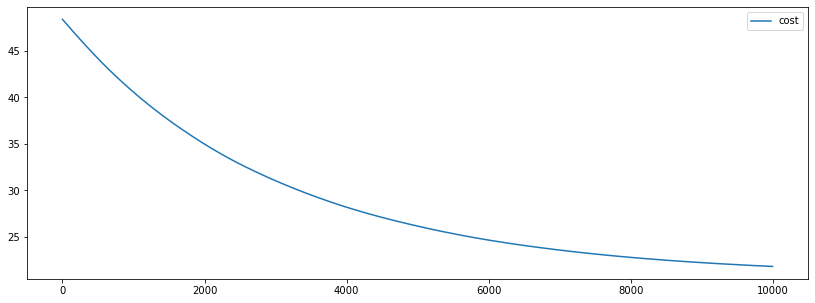

In [4]:
w_,b_ = nn_regression(eta = 0.000000005, iterations= 10000).fit(X,y)

In [5]:
w_, b_

(array([[-7.73732116e-01],
        [ 1.21367230e+00],
        [ 1.75120374e+00],
        [-5.64170304e-01],
        [ 1.57485809e+00],
        [ 2.18983563e+00],
        [ 7.16159019e-01],
        [-5.32812580e-01],
        [ 2.17508442e+00],
        [-1.48728572e-01],
        [-2.28935256e+00],
        [ 1.10355199e-04],
        [ 9.38935907e-01]]),
 0.0002637745604067884)

In [6]:
X.shape

(506, 13)

In [7]:
y.T.shape

(1, 506)

In [8]:
class nn_regression_hidden(object):
    def __init__(self, eta = 0.0005, iterations = 1000, hidden = 50):
        self.hidden = hidden
        self.eta = eta
        self.iterations = iterations
    
    def fit(self,X,y):
        X_ = X.T # 13x506
        y_ = y.T # 1x506
        w2_ = np.random.randn(1, self.hidden) * 0.01
        b2_ = np.zeros((1, 1))
        w1_ = np.random.randn(self.hidden, X.shape[1])  * 0.01
        b1_ = np.zeros((self.hidden,1))
        cost_ = []
        m_ = len(y)
        i = 1
        print('estimation starts now')
        while(i != self.iterations):
            Z1 = np.dot(w1_,X_) + b1_ # 50x13  13x 506 => 50x 506 + 50x1
            A1 = self.tanh(Z1)  # 50x 506
            Z2 =  np.dot(w2_,A1) + b2_  # 1x50 50x506 => 1x506 + 1x1
            A2 = Z2  # 1x506
            #print(Z.shape)
            mse_ = self.mse(Z2,y,m_) #used mae
            cost_.append(mse_)
            ## derivatives
            dZ2 = (2/m_) * (A2-y_)  # 1x506
            dW2 = (2/m_) * np.dot(dZ2, A1.T) # 1x506 506x50 => 1x50
            db2 = (2/m_) * np.sum(dZ2, axis =1, keepdims=True) # 
            dZ1 = np.dot(w2_.T,dZ2) * (1 - np.power(A1,2)) #  
            dW1 =  (2/m_) * np.dot(dZ1,X_.T) # 
            db1 = (2/m_) * np.sum(dZ1, axis =1, keepdims=True) #
            ## updates
            w2_ -= self.eta* dW2 #  
            b2_ -= self.eta *db2 #  
            w1_ -= self.eta* dW1
            b1_ -= self.eta *db1
            if i % 100 ==0:
                print(f'epoch:{i}__cost:{mse_}')     
            i += 1
        history = pd.DataFrame(cost_, columns=['cost'])
        history.plot(figsize = (14,5))
        return w2_,b2_,w1_,b1_
    
    def mse(self,y_true, y_pred,m):
        return np.sum(np.abs(y_pred-y_true))/m
    
    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))
    
    def tanh(self,z):
        return (np.exp(z)-np.exp(-z))/ (np.exp(z)+np.exp(-z))

estimation starts now
epoch:100__cost:6023.981831706192
epoch:200__cost:3979.921798646452
epoch:300__cost:3593.9161878629247
epoch:400__cost:3323.893974337836
epoch:500__cost:3813.0306879554482
epoch:600__cost:3360.7267287696345
epoch:700__cost:3304.711556215266
epoch:800__cost:3317.2568073575776
epoch:900__cost:3335.887797533026
epoch:1000__cost:3348.7162048607465
epoch:1100__cost:3355.759586953062
epoch:1200__cost:3313.5489582286436
epoch:1300__cost:3308.595403690943
epoch:1400__cost:3326.8930205528936
epoch:1500__cost:3343.131405050887
epoch:1600__cost:3352.7332539753443
epoch:1700__cost:3357.9106895463246
epoch:1800__cost:3360.5488165404936
epoch:1900__cost:3361.9750261505887
epoch:2000__cost:3320.356783413057
epoch:2100__cost:3306.969190469258
epoch:2200__cost:3324.2547579903344
epoch:2300__cost:3341.465619903889
epoch:2400__cost:3351.8223179470433
epoch:2500__cost:3357.4314648060636
epoch:2600__cost:3360.304766806481
epoch:2700__cost:3361.854420103897
epoch:2800__cost:3362.655071

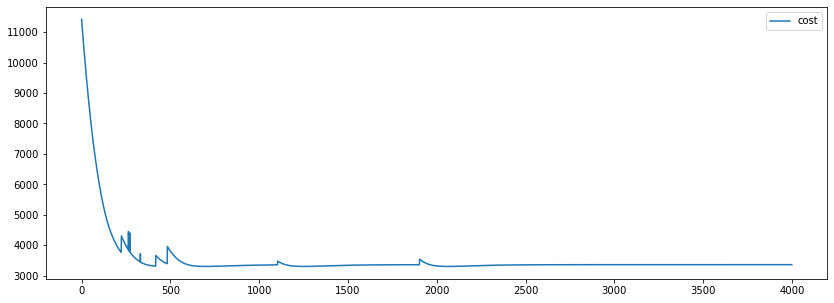

In [13]:
w2_,b2_,w1_,b1_ = nn_regression_hidden(eta = 0.05, iterations= 4000, hidden= 16).fit(X,y)

In [10]:
X.shape

(506, 13)